# OpenCV에서 이미지 Gradient (Sobel, Scharr, Laplacian)

**Google Colab**에서 OpenCV를 사용해 이미지의 **에지(Edges)**, **Gradient**(기울기)를 구하는 방법을 실습합니다.

## 목차
1. **이론**: Sobel, Scharr, Laplacian
2. **Colab 준비** (라이브러리 설치)
3. **이미지 로드** & Gradient 연산 (Sobel/Laplacian)
4. **Scharr** (특수 케이스)
5. **데이터 타입 이슈** (CV_8U vs CV_64F)
6. **과제** (파라미터 변경, 절대값 처리 비교, etc.)
7. **Q&A**


# 1. 이론: Sobel, Scharr, Laplacian

### 1.1 Sobel 연산자
- **Sobel**: 가우시안 스무딩 + 1차 미분
- 방향: x방향(`dx=1,dy=0`), y방향(`dx=0,dy=1`)
- 커널 크기 `ksize`: 일반적으로 3,5,7...
- OpenCV 함수: `cv.Sobel(src, ddepth, dx, dy, ksize, scale, delta, borderType)`
  - `ddepth`: 출력 이미지 깊이 (예: `cv.CV_64F`)
  - `dx,dy`: 미분 차수( x방향=1이면 dx=1,dy=0 )
  - `ksize`: 커널 크기 (3,5,7 등) *단, Scharr=3x3 특화*

### 1.2 Scharr 연산자
- Sobel 연산자에서 **3x3 ksize** 특수 최적화
- `cv.Sobel(..., ksize=-1)` 이면 **Scharr** 사용
- x방향, y방향 미분 시 정확도 향상

### 1.3 Laplacian 연산자
- 2차 미분(라플라시안): 에지 검출 강화, 노이즈에도 민감
- 수식: $\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$
- OpenCV: `cv.Laplacian(src, ddepth, ksize, scale, delta, borderType)`

### 1.4 데이터 타입 이슈
- 결과 값이 음수/양수 모두 가능
- 만약 `CV_8U`로 바로 출력하면 음수 부분이 0으로 Clamp
- 에지를 양방향(밝->어둡, 어둡->밝) 모두 보고 싶다면, `CV_16S` or `CV_64F`로 계산 후 `np.absolute()` → 최종 `np.uint8` 변환 권장.

# 2. Colab 준비 (라이브러리 설치)

In [ ]:
!pip install opencv-python numpy matplotlib --quiet
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version:", cv.__version__)

OpenCV version: 4.10.0


아래 셀은 **예시 이미지**(`dave.jpg`등)을 다운로드하거나, 사용자가 Colab에 업로드할 수 있습니다.

In [ ]:
# !wget -q url입력
# import os
# if not os.path.exists('dave.jpg'):
#     print("Download failed. Please upload your own image named 'dave.jpg' or change filename.")
# else:
#     print("dave.jpg downloaded.")

# 3. 이미지 로드 & Gradient 연산
Sobel x, Sobel y, Laplacian을 구해본 뒤 시각화.

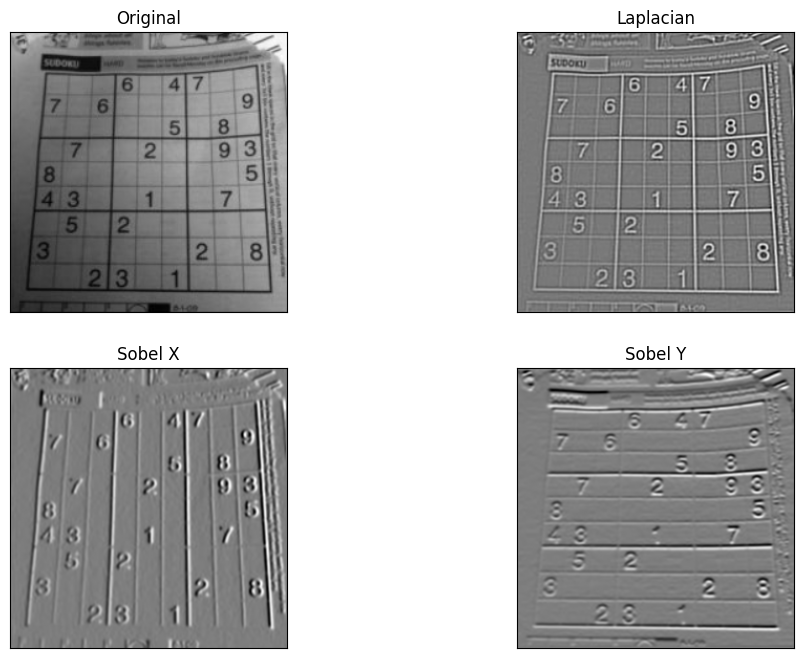

In [ ]:
img_path = 'dave.png'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Upload or modify the path.")

# Laplacian
lap = cv.Laplacian(img, cv.CV_64F, ksize=5)

# Sobel X
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
# Sobel Y
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

# 시각화
plt.figure(figsize=(12,8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(lap, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# 4. Scharr (특수 케이스)
Sobel 연산자에서 `ksize=3`을 더 정확하게 구현한 것이 Scharr입니다.

OpenCV에서 `ksize=-1`과 `dx=1, dy=0`(또는 반대)로 지정하면 **Scharr** 필터를 적용.

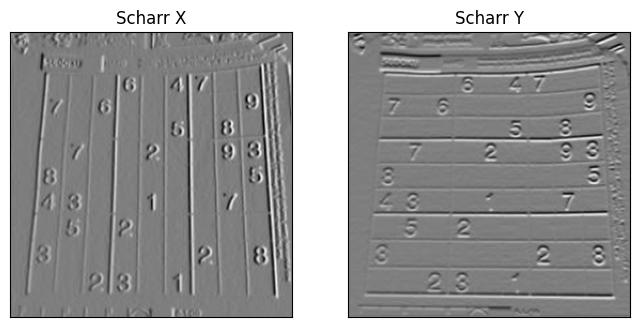

In [ ]:
scharr_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=-1)
scharr_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=-1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(scharr_x, cmap='gray')
plt.title('Scharr X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(scharr_y, cmap='gray')
plt.title('Scharr Y'), plt.xticks([]), plt.yticks([])
plt.show()

# 5. 데이터 타입 이슈 (CV_8U vs CV_64F)
양방향 에지(밝->어둡, 어둡->밝)를 모두 살리고 싶다면, `CV_64F` 등으로 연산 후 **절댓값**을 취해 `cv2.convertScaleAbs` or `np.uint8`로 변환하는 방식을 권장.

아래 예시는 Sobel x방향만 비교.

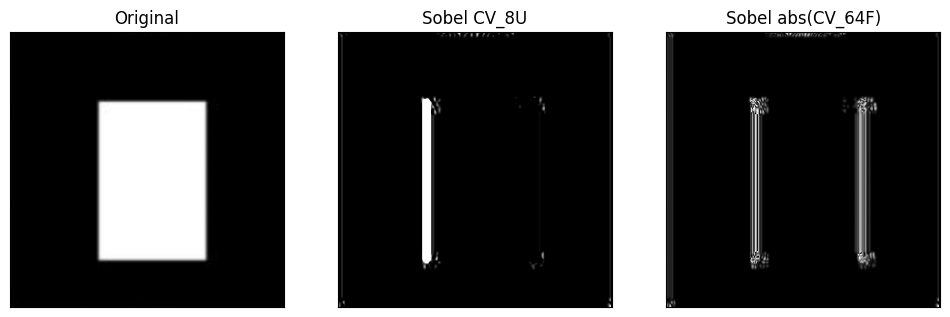

In [ ]:
img_box_path = 'box.png'
!wget -q url입력
if not os.path.exists('box.png'):
    print("box.png not found. Please check.")
else:
    img_box = cv.imread('box.png', cv.IMREAD_GRAYSCALE)
    if img_box is None:
        print("box.png read error.")
    else:
        sobelx_8u = cv.Sobel(img_box, cv.CV_8U, 1, 0, ksize=5)
        sobelx_64f = cv.Sobel(img_box, cv.CV_64F, 1, 0, ksize=5)
        abs_sobel64f = np.absolute(sobelx_64f)
        sobel_8u = np.uint8(abs_sobel64f)

        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1), plt.imshow(img_box, cmap='gray')
        plt.title('Original'), plt.xticks([]), plt.yticks([])

        plt.subplot(1,3,2), plt.imshow(sobelx_8u, cmap='gray')
        plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])

        plt.subplot(1,3,3), plt.imshow(sobel_8u, cmap='gray')
        plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

        plt.show()

# 6. 과제
1. **Sobel**: ksize=3,5,7 등을 바꿔보고 결과 차이 확인.
2. **Scharr**: Sobel(3×3)와 비교하여 차이 확인.
3. **Laplacian**: ksize=1,3,5 등으로 적용해 보고, 어떤 차이가 있는지.
4. **데이터 타입**: `CV_8U` vs `CV_64F`로 계산한 뒤 결과 차이(양방향 에지)를 관찰.
5. **Canny** 에지 검출과 비교해, Sobel/Laplacian/Scharr와 어떤 차이가 있는지 토론.


# Q&A
- **Q**: Sobel x, Sobel y를 어떻게 한 장으로 합칠 수 있나요?
  - **A**: `magnitude = sqrt(sobelx^2 + sobely^2)`. OpenCV에서는 `cv.magnitude(gx, gy)`로 계산 가능.
- **Q**: Laplacian ksize=1은 어떤 커널을 쓰나요?
  - **A**: OpenCV 문서 참고, 라플라시안 기본 3×3 커널.
- **Q**: Scharr 연산자의 장점?
  - **A**: 3×3에서 Sobel보다 더 정확한 미분 근사치.

이상으로 **Gradient 연산**(Sobel, Scharr, Laplacian)을 Colab에서 실습했습니다.
추가 과제를 통해 다양한 파라미터를 조정해보세요!